# Project 3: Implementing a Simple Recurrent Neural Network (RNN)

## Introduction

In this project, you will design, implement, and evaluate a simple Recurrent Neural Network (RNN) from scratch. This will involve building the entire pipeline, from data preprocessing to model training and evaluation.

## Objectives

1. Set up TensorFlow or PyTorch environments. You are free to choose your preferred DL platform.
2. Use GPU for training.
3. Create a data loader and implement data preprocessing where needed.
4. Design a Convolutional Neural Network.
5. Train and evaluate your model. Make sure to clearly show loss and accuracy values. Include visualizations too.
6. Answer assessment questions.

## Dataset

You are free to choose any dataset for this project! Kaggle would be a good source to look for datasets. Below are some examples:
- Daily Minimum Temperatures in Melbourne: This dataset contains the daily minimum temperatures in Melbourne, Australia, from 1981 to 1990.
- Daily Bitcoin Prices: This dataset contains historical daily prices of Bitcoin, which can be used for time series forecasting projects.
- Text8 Dataset: This dataset consists of the first 100 million characters from Wikipedia. It's great for text generation or language modeling tasks.
- IMDB Movie Reviews: This dataset contains 50,000 movie reviews for sentiment analysis, split evenly into 25,000 training and 25,000 test sets.
- Jena Climate Dataset: This dataset records various weather attributes (temperature, pressure, humidity, etc.) every 10 minutes, making it ideal for time series analysis.
- Earthquake Aftershocks: This dataset contains seismic data, suitable for predicting aftershocks following major earthquakes.


Reference: https://www.kaggle.com/code/alincijov/california-births-1959-time-series/input

###Create a Data Loader and Implement Data Preprocessing



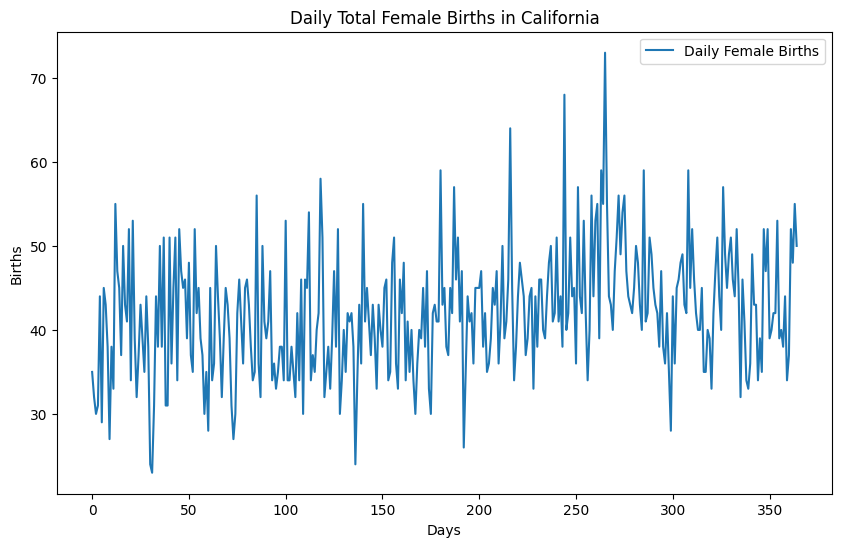

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv('daily-total-female-births-CA.csv', usecols=[1])
data = df.values.astype('float32')

plt.figure(figsize=(10, 6))
plt.plot(data, label='Daily Female Births')
plt.title('Daily Total Female Births in California')
plt.xlabel('Days')
plt.ylabel('Births')
plt.legend()
plt.show()

scaler = MinMaxScaler(feature_range=(0, 1))
data_normalized = scaler.fit_transform(data)

def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i + seq_length]
        y = data[i + seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

seq_length = 12
X, y = create_sequences(data_normalized, seq_length)

X = np.reshape(X, (X.shape[0], X.shape[1], 1))
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size

X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

####Design Recurrent Neural Network


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

model = Sequential([
    SimpleRNN(50, activation='relu', input_shape=(seq_length, 1)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 50)                  │           2,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,651 (10.36 KB)

 Trainable params: 2,651 (10.36 KB)

 Non-trainable params: 0 (0.00 B)

####Train and Evaluate Your Model

Epoch 1/100
282/282 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0380 - val_loss: 0.0177
Epoch 2/100
282/282 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0207 - val_loss: 0.0164
Epoch 3/100
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0228 - val_loss: 0.0167
Epoch 4/100
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0207 - val_loss: 0.0159
Epoch 5/100
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0188 - val_loss: 0.0161
Epoch 6/100
282/282 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0224 - val_loss: 0.0164
Epoch 7/100
282/282 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0223 - val_loss: 0.0164
Epoch 8/100
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0245 - val_loss: 0.0223
Epoch 9/100
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0210 - val_loss: 0.0158
Epoch 10/100
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0194 - val_loss: 0.0164
Epoch 11/100
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0191 - val_loss: 0.0207
Epoch 12/100
282/282 ━━━━━━━━━━━━━━━━━━━━

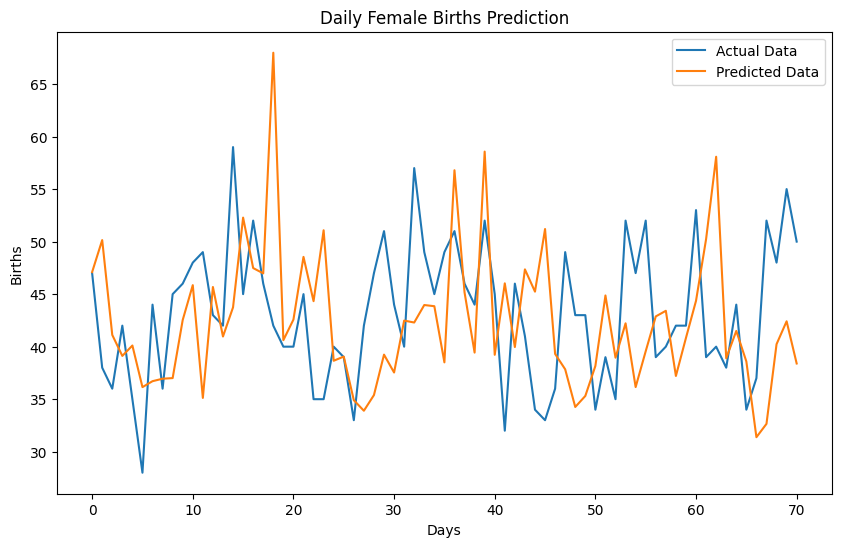

In [4]:
epochs = 100
history = model.fit(X_train, y_train, epochs=epochs, batch_size=1, validation_data=(X_test, y_test))

train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
y_train_inv = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

from sklearn.metrics import mean_squared_error
train_rmse = np.sqrt(mean_squared_error(y_train_inv, train_predict))
test_rmse = np.sqrt(mean_squared_error(y_test_inv, test_predict))
print(f'Train RMSE: {train_rmse}')
print(f'Test RMSE: {test_rmse}')

plt.figure(figsize=(10, 6))
plt.plot(y_test_inv, label='Actual Data')
plt.plot(test_predict, label='Predicted Data')
plt.title('Daily Female Births Prediction')
plt.xlabel('Days')
plt.ylabel('Births')
plt.legend()
plt.show()

####Predict Future Values

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━

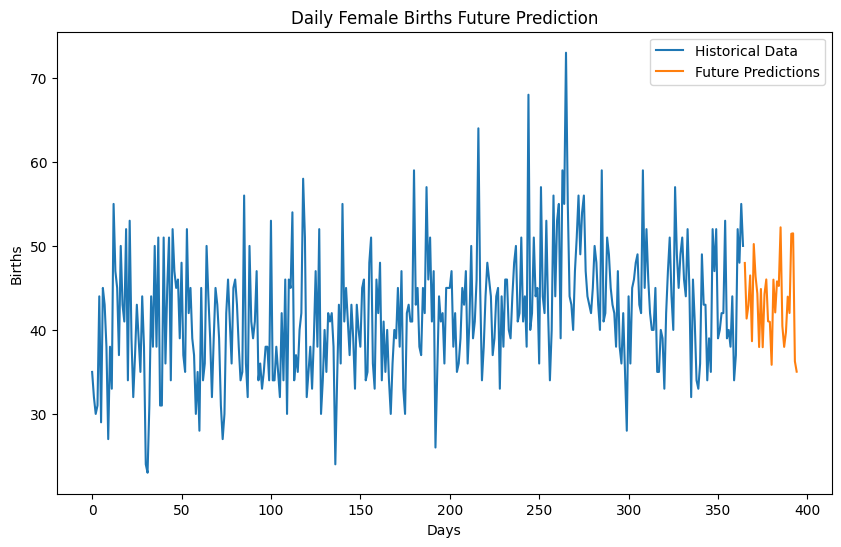

In [5]:
def predict_future(model, data, future_periods, seq_length):
    predictions = data[-seq_length:].tolist()
    predictions = [x[0] for x in predictions]
    for _ in range(future_periods):
        seq = np.array(predictions[-seq_length:]).reshape((1, seq_length, 1))
        prediction = model.predict(seq)
        predictions.append(prediction[0, 0])
    return predictions[seq_length:]

future_periods = 30
predictions = predict_future(model, data_normalized, future_periods, seq_length)
predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

plt.figure(figsize=(10, 6))
plt.plot(scaler.inverse_transform(data_normalized), label='Historical Data')
plt.plot(np.arange(len(data_normalized), len(data_normalized) + future_periods), predictions, label='Future Predictions')
plt.title('Daily Female Births Future Prediction')
plt.xlabel('Days')
plt.ylabel('Births')
plt.legend()
plt.show()

---
### Questions
Answer the following questions in detail.

**1. What is a Recurrent Neural Network (RNN)? Describe its key components and how they differ from those in a feedforward neural network.**

*RNNs are a class of neural networks designed to handle sequential data by maintaining a hidden state that captures information about previous elements in the sequence. The key components of an RNN include the input layer, hidden layer(s) with recurrent connections, and output layer. Unlike feedforward neural networks, RNNs have connections that loop back on themselves, allowing them to maintain memory over time and process sequences of varying lengths.*


**2. Explain the purpose of the recurrent connection in an RNN. How does it enable the network to handle sequential data?**

*The recurrent connection allows the hidden state of an RNN to maintain information about previous inputs, which is important for processing sequences. At each timestep, the hidden state is updated based on the current input and the previous hidden state. This enables the network to learn dependencies over time, making RNNs suitable for tasks like time series prediction, language modeling, and sequence-to-sequence learning.*


**3. What are vanishing and exploding gradients, and how do they affect the training of RNNs?**

*Vanishing gradients occur when the gradients used to update the network's weights become very small, making it difficult for the network to learn long-range dependencies. Exploding gradients happen when gradients become excessively large, causing unstable updates and potentially making the network weights diverge. Both issues are particularly problematic in RNNs due to their sequential nature and can hinder effective training.*

**4. Describe the Long Short-Term Memory (LSTM) network and its key components. How does it address the issues of vanishing and exploding gradients?**

*LSTM networks are a type of RNN designed to address the vanishing and exploding gradient problems. Key components include the cell state, and three gates: the input gate, forget gate, and output gate. The cell state acts as a memory, carrying information across many timesteps. The gates control the flow of information, allowing the network to maintain long-term dependencies and prevent gradients from vanishing or exploding during training.*

**5. What is the purpose of the GRU (Gated Recurrent Unit) in RNNs? Compare it with LSTM.**

*GRUs are a simplified variant of LSTMs designed to achieve similar performance with fewer parameters. GRUs combine the forget and input gates into a single update gate and use a reset gate to control information flow. Compared to LSTMs, GRUs have a simpler architecture, making them computationally efficient while still effectively addressing the vanishing gradient problem.*

**6. Explain the role of the hidden state in an RNN. How is it updated during the training process?**

*The hidden state in an RNN serves as the network's memory. It keeps track of information from previous inputs as the network processes the sequence. During training, the hidden state is updated at each step based on the current input and the previous hidden state. This update process allows the RNN to remember important information and use it to make predictions or decisions about the sequence.*

**7. What are some common evaluation metrics used to assess the performance of an RNN on a sequential task, such as language modeling or time series forecasting?**

* Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) for regression tasks like time series forecasting.
* Cross-Entropy Loss for classification tasks such as language modeling.
* Perplexity for language models, measuring how well the model predicts a sample.
* Accuracy, Precision, Recall, and F1 Score for classification tasks.

**8. How does data preprocessing impact the performance of RNNs? Provide examples of preprocessing steps for text and time series data.**

*Data preprocessing impacts the performance of RNNs as it ensures the data is clean and in a suitable format. For text data, common preprocessing steps include tokenization (splitting text into words or subwords), padding (ensuring sequences are of the same length), normalization (lowercasing text and removing special characters), and embedding (converting tokens into dense vectors). For time series data, preprocessing typically involves normalization or standardization (scaling data to a common range), handling missing values (imputing or interpolating missing points), and creating lag features (generating features representing previous timesteps).*

**9. What is sequence-to-sequence learning in the context of RNNs, and what are its applications?**

*Sequence-to-sequence learning involves mapping an input sequence to an output sequence, typically using two RNNs: an encoder and a decoder. The encoder processes the input sequence and produces a context vector, which the decoder uses to generate the output sequence. Applications include machine translation, speech recognition, text summarization, and chatbot development.*

**10. How can RNNs be used for anomaly detection in time series data? Describe the general approach.**

*RNNs can be used for anomaly detection in time series data by learning normal patterns during training. Once trained on normal data, the RNN can be used to reconstruct input sequences. The reconstruction error, which measures the difference between the actual and predicted values, is then calculated. If this error exceeds a certain threshold, the data point is considered an anomaly. This leverages the RNN's ability to remember and predict sequential data patterns to identify unusual or unexpected behavior.*

---
### Submission
Submit a link to your completed Jupyter Notebook (e.g., on GitHub (private) or Google Colab) with all the cells executed, and answers to the assessment questions included at the end of the notebook.